In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
from IPython.display import display, Latex
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')

def Find_Derivative_Parametric(func_x, func_y, order = 1):
  t = Symbol('t')
  dx_cur = diff(func_x, t)
  dy_cur = diff(func_y, t)
  if (order == 1):
    return dy_cur/dx_cur
  else:
    dx2_cur = diff(func_x, t, 2)
    dy2_cur = diff(func_y, t, 2)
    return (dx_cur * dy2_cur - dx2_cur * dy_cur)/ (dx_cur**3)

def x(t):
  return Sin(t) - t * Cos(t)
def y(t):
  return Cos(t) + t * Sin(t)

dx_y = Find_Derivative_Parametric(x(t), y(t), 1)
dx2_y = Find_Derivative_Parametric(x(t), y(t), 2)
display(Latex(fr"\text{{Прозводная первого порядка: }} {latex(simplify(dy_x))}"))
display(Latex(fr"\text{{Прозводная второго порядка: }} {latex(simplify(dy2_x))}"))

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [ ]:
def x(t):
  return t**2 - 2 * t
def y(t):
  return t**2 + 2 * t

dx_y = Find_Derivative_Parametric(x(t), y(t), 1)
dx2_y = Find_Derivative_Parametric(x(t), y(t), 2)
dx_y_num, dx_y_denum = fraction(dx_y)
dx2_y_num, dx2_y_denum = fraction(dx2_y)
dx_y_num_null = solveset(dx_y_num, domain = S.Reals)
dx_y_denum_null = solveset(dx_y_denum, domain = S.Reals)
dx2_y_num_null = solveset(dx2_y_num, domain = S.Reals)
dx2_y_denum_null = solveset(dx2_y_denum, domain = S.Reals)
display(Latex(fr"\text{{Нули производной первого порядка: }}{latex(dx_y_num_null if len(dx_y_num_null) !=0 else 'None')}"))
display(Latex(fr"\text{{Сингулярные точки производной первого порядка: }}{latex(dx_y_denum_null if len(dx_y_denum_null) !=0 else 'None')}"))
display(Latex(fr"\text{{Нули производной второго порядка: }}{latex(dx2_y_num_null if len(dx2_y_num_null) !=0 else 'None')}"))
display(Latex(fr"\text{{Сингулярные точки производной второго порядка: }}{latex(dx2_y_denum_null if len(dx2_y_denum_null) !=0 else 'None')}"))

### Задание 3.
Найти точки экстремума и точки перегиба функции Задания 2.

In [ ]:
crit_points = sorted([*Union(dx_y_num_null, dx_y_denum_null)])
lst_extr_interval = [crit_points[0] - 0.5] + [(crit_points[i] + crit_points[i + 1])/ 2 for i in range(len(crit_points) - 1)] + [crit_points[-1] + 0.5]
inflect_points = sorted([*Union(dx2_y_num_null, dx2_y_denum_null)])
lst_inflect_interval = [inflect_points[0] - 0.5] + [(inflect_points[i] + inflect_points[i + 1])/ 2 for i in range(len(inflect_points) - 1)] + [inflect_points[-1] + 0.5]

lst_maxs = []
lst_mins = []
for i in range(len(crit_points)):
  cur_point = crit_points[i]
  if cur_point in dx_y_num_null:
    dif_val_left = dx_y.subs({t : lst_extr_interval[i]})
    dif_val_right = dx_y.subs({t :lst_extr_interval[i + 1]})
    x_val_left = float(x(lst_extr_interval[i]))
    x_val_right = float(x(lst_extr_interval[i + 1]))
    if (dif_val_left < 0 and dif_val_right > 0 and x_val_left < x_val_right) or (dif_val_left > 0 and dif_val_right < 0 and x_val_left > x_val_right):
      lst_mins.append(cur_point)
    elif (dif_val_left > 0 and dif_val_right < 0 and x_val_left < x_val_right) or (dif_val_left < 0 and dif_val_right > 0 and x_val_left > x_val_right):
      lst_maxs.append(cur_point)

lst_inflect_points = []
for i in range(len(inflect_points)):
  cur_point = inflect_points[i]
  if (cur_point in dx2_y_num_null):
    dif_val_left = dx2_y.subs({t: lst_inflect_interval[i]})
    dif_val_right = dx2_y.subs({t : lst_inflect_interval[i + 1]})
    if (dif_val_left * dif_val_right < 0):
      lst_inflect_points.append(cur_point)


display(Latex(fr"\text{{Точки локального макисмума функции : }}{latex(lst_maxs if len(lst_maxs) != 0 else 'None')}"))
display(Latex(fr"\text{{Точки локального минимума функции : }}{latex(lst_mins if len(lst_mins) != 0 else 'None')}"))
display(Latex(fr"\text{{Точки перегиба функции : }}{latex(lst_inflect_points if len(lst_inflect_points) != 0 else 'None')}"))

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно.
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [ ]:
def x(t):
  return sympy.E**t
def y(t):
  return t * sympy.E**(2 * t)

dx2_y = Find_Derivative_Parametric(x(t), y(t), 2)
dx2_num_y, dx2_denum_y = fraction(dx2_y)
dx2_num_null = solveset(dx2_num_y, domain = S.Reals)
dx2_denum_null = solveset(dx2_denum_y, domain = S.Reals)
lst_posible_inflect = sorted([*Union(dx2_num_null, dx2_denum_null)])
lst_inflect_intervals = [lst_posible_inflect[0] - 0.5] + [(lst_posible_inflect[i] + lst_posible_inflect[i + 1])/ 2 for i in range(len(lst_posible_inflect) - 1)] + [lst_posible_inflect[-1] + 0.5]

lst_inflect = []
for i in range(len(lst_posible_inflect)):
  cur_point = lst_posible_inflect[i]
  if cur_point in dx2_num_null:
    diff_val_left = dx2_y.subs({t : lst_inflect_intervals[i]})
    diff_val_right = dx2_y.subs({t : lst_inflect_intervals[i + 1]})
    if (diff_val_left * diff_val_right < 0):
      lst_inflect.append(cur_point)

display(Latex(fr"\text{{Точки перегиба функции : }}{latex(*lst_inflect if len(lst_inflect) != 0 else 'None')}"))

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$.

Если $\varphi(t_0) = \psi(t_0) = \infty$ и
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$.

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

Варинат №134


$x = 5 e^{t} + 5 e^{- t}$

$y = 5 e^{t} - 5 e^{- t}$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

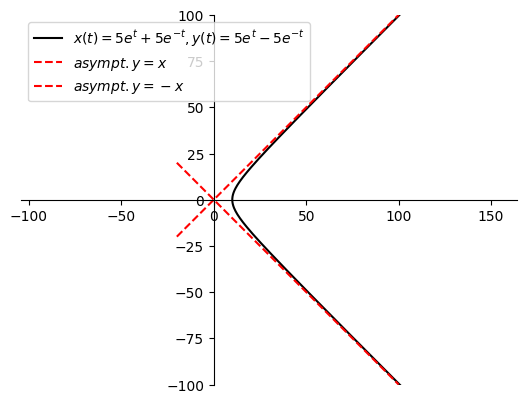

In [117]:
def x(t, lib = "sympy"):
  if (lib == "sympy"):
    return 5 * sympy.E**t + 5 * sympy.E **(-t)
  else:
    return 5 * np.e**t + 5 * np.e ** (-t)

def y(t, lib = "sympy"):
  if (lib == "sympy"):
    return 5 * sympy.E**t - 5 * sympy.E **(-t)
  else:
    return 5 * np.e**t - 5 * np.e ** (-t)


# Заметим,что x -> +inf и y -> +inf при t -> +inf
# А также, что x -> +inf и y -> -inf при t -> -inf
# Вертикальных и горизональных ассимптот нет
display(Latex(fr"x(t) = {latex(x(t))}"))
display(Latex(fr"y(t) = {latex(y(t))}"))

print()
display(Latex(r"\text{{При }} t \to +\infty"))
display(Latex(r"\lim\limits_{t\to +\infty} x(t) = " + fr"{latex(limit(x(t), t, +sympy.oo))}"))
display(Latex(r"\lim\limits_{t\to +\infty} y(t) = " + fr"{latex(limit(y(t), t, +sympy.oo))}"))

k_1 = limit(y(t)/x(t), t, +sympy.oo)
b_1 = limit((y(t) - k_1 * x(t)), t, +sympy.oo)
display(Latex(r"\lim\limits_{t\to +\infty} \frac{y(t)}{x(t)} = " + fr"{latex(k_1)}" + " = k"))
display(Latex(r"\lim\limits_{t\to +\infty} (y(t) - k * x(t)) = " + fr"{latex(b_1)}" + " = b"))
display(Latex(r"\Rightarrow у = x  - \text{{Наклонная ассимтота функции}}"))

print()
display(Latex(r"\text{{При }} t \to -\infty"))
display(Latex(r"\lim\limits_{t\to -\infty} x(t) = " + fr"{latex(limit(x(t), t, -sympy.oo))}"))
display(Latex(r"\lim\limits_{t\to -\infty} y(t) = " + fr"{latex(limit(y(t), t, -sympy.oo))}"))

k_2 = limit(y(t)/x(t), t, -sympy.oo)
b_2 = limit((y(t) - k_2 * x(t)), t, -sympy.oo)
display(Latex(r"\lim\limits_{t\to -\infty} \frac{y(t)}{x(t)} = " + fr"{latex(k_2)}" + " = k"))
display(Latex(r"\lim\limits_{t\to -\infty} (y(t) - k * x(t)) = " + fr"{latex(b_2)}" + " = b"))
display(Latex(r"\Rightarrow у = -x  - \text{{Наклонная ассимтота функции}}"))

T = np.linspace(-5, 5, 200)
X = np.linspace(-20, 100, 200)
ax = plt.gca()
ax.plot(x(T, "numpy"), y(T, "numpy"), color = "black", label = f'$ x(t) = {latex(x(t))}, y(t) = {latex(y(t))}$')
ax.plot(X, k_1 * X + b_1, color = "red", linestyle = '--', label=f'$asympt. y= x$')
ax.plot(X, k_2 * X + b_2, color = "red", linestyle = '--', label=f'$asympt. y= -x$')
ax.axis('equal')
ax.set_xlim(-20, 80)
ax.set_ylim(-100, 100)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.legend()